In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import re
from scipy.optimize import curve_fit


In [ ]:
plt.rcParams.update({
    "figure.figsize": [6, 4],     # Figure size
     "text.usetex": True, 
    "font.family": "serif",       # Use Times New Roman or similar
    "font.size": 10,              # Base font size
    "axes.labelsize": 12,         # Axis labels
    "xtick.labelsize": 10,        # X-ticks
    "ytick.labelsize": 10,        # Y-ticks
    "legend.fontsize": 9,         # Legend
    "figure.dpi": 600,            # High resolution for raster exports
})


In [3]:
def function(x,a,b):
    return a*x**b

In [4]:
def calculate_diffusion_exponent(file_path, dt, output_interval):
    """
    Analyzes an MSD data file to calculate the diffusion exponent (alpha).
    Returns the exponent as a float, or NaN if fitting fails.
    """

    msd_data = np.loadtxt(file_path)


    time_per_point = dt * output_interval
    time = np.arange(0, output_interval+dt,dt)
    popt, pcov = curve_fit(function,time, msd_data)
    print(time)
    return popt[1]
    


In [10]:
analysis_results = []
filename_pattern = re.compile(r'A2_0.1000_tau_(\d+\.?\d*)_beta_(\d+\.?\d*)\.csv$')


SIM_DT = 0.01
SIM_OUTPUT_INTERVAL = 1000
DATA_DIR = '../MSD/' 
PLOT_DIR = '../Plot/'

print("Scanning for MSD files...")
for filename in os.listdir(DATA_DIR):
    match = filename_pattern.match(filename)
    if match:
        try:
            tau, beta = [float(v) for v in match.groups()]
            full_path = os.path.join(DATA_DIR, filename)
            
            alpha = calculate_diffusion_exponent(full_path, SIM_DT, SIM_OUTPUT_INTERVAL)
            
            if not np.isnan(alpha):
                print(f"  -> Analyzed: tau={tau:.2f}, beta={beta:.2f} -> alpha = {alpha:.3f}")
                analysis_results.append({ 'tau': tau, 'beta': beta, 'alpha': alpha})
        except Exception as e:
            print(f"Could not process file {filename}: {e}")

if not analysis_results:
    print("\nNo data files were found to analyze.")
else:
    # 2. Create a pandas DataFrame for plotting
    df = pd.DataFrame(analysis_results)
    
    # Create a new column for clear labels in the plot legend
    df['Case'] = 'τ=' + df['tau'].astype(str) + ', β=' + df['beta'].astype(str)

Scanning for MSD files...
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.20, beta=2.00 -> alpha = 1.628
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.20, beta=3.00 -> alpha = 1.751
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.40, beta=5.00 -> alpha = 1.227
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.60, beta=1.00 -> alpha = 1.074
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.40, beta=4.00 -> alpha = 1.222
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.90, beta=5.00 -> alpha = 1.021
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.90, beta=4.00 -> alpha = 0.996
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
  -> Analyzed: tau=0.80, beta=1.00

In [6]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='A2', y='alpha', hue='Case', marker='o')

<Axes: xlabel='A2', ylabel='alpha'>

Error in callback <function _draw_all_if_interactive at 0x115380d60> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u03c4=0.1, \\u03b2=2.0'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpr6l_1zlc f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9f5b597756525056e699.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9f5b597756525056e699.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>

(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/firstaid/un
derscore-ltx.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9f5b597756525056e699.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character τ (U+03C4)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily τ
                  =0.1, β=2.0}%
No pages of output.
Transcript written on tmpr6l_1zlc/f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9
f5b597756525056e699.log.




RuntimeError: latex was not able to process the following string:
b'\\u03c4=0.1, \\u03b2=2.0'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpyblvxj22 f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9f5b597756525056e699.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025/Homebrew) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9f5b597756525056e699.tex
LaTeX2e <2024-11-01> patch level 2
L3 programming layer <2025-01-18>

(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/articl
e.cls
Document Class: article 2024/06/29 v1.4n Standard LaTeX document class

(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/size10
.clo))
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/type1cm/typ
e1cm.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/cm-super/ty
pe1ec.sty
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/t1cmr.
fd))
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/inpute
nc.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/geometry/ge
ometry.sty
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/graphics/ke
yval.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/generic/iftex/ifv
tex.sty
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/generic/iftex/ift
ex.sty)))
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/underscore/
underscore.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/firstaid/un
derscore-ltx.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/base/textco
mp.sty)
(/opt/homebrew/Cellar/texlive/20250308_1/share/texmf-dist/tex/latex/l3backend/l
3backend-dvips.def)
No file f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9f5b597756525056e699.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character τ (U+03C4)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily τ
                  =0.1, β=2.0}%
No pages of output.
Transcript written on tmpyblvxj22/f80826a1c9763346c3b2c41d5c2551bf000d1f9ca26e9
f5b597756525056e699.log.




<Figure size 7200x4800 with 1 Axes>

In [11]:
df

,tau,beta,alpha,Case
0,0.2,2.0,1.627514,"τ=0.2, β=2.0"
1,0.2,3.0,1.750984,"τ=0.2, β=3.0"
2,0.4,5.0,1.227419,"τ=0.4, β=5.0"
3,0.6,1.0,1.073747,"τ=0.6, β=1.0"
4,0.4,4.0,1.222120,"τ=0.4, β=4.0"
5,0.9,5.0,1.021470,"τ=0.9, β=5.0"
6,0.9,4.0,0.996216,"τ=0.9, β=4.0"
7,0.8,1.0,1.018979,"τ=0.8, β=1.0"
8,0.5,1.0,1.104256,"τ=0.5, β=1.0"
9,0.7,4.0,1.076058,"τ=0.7, β=4.0"


In [13]:
heatmap_data = df.pivot(index='tau', columns='beta', values='alpha')

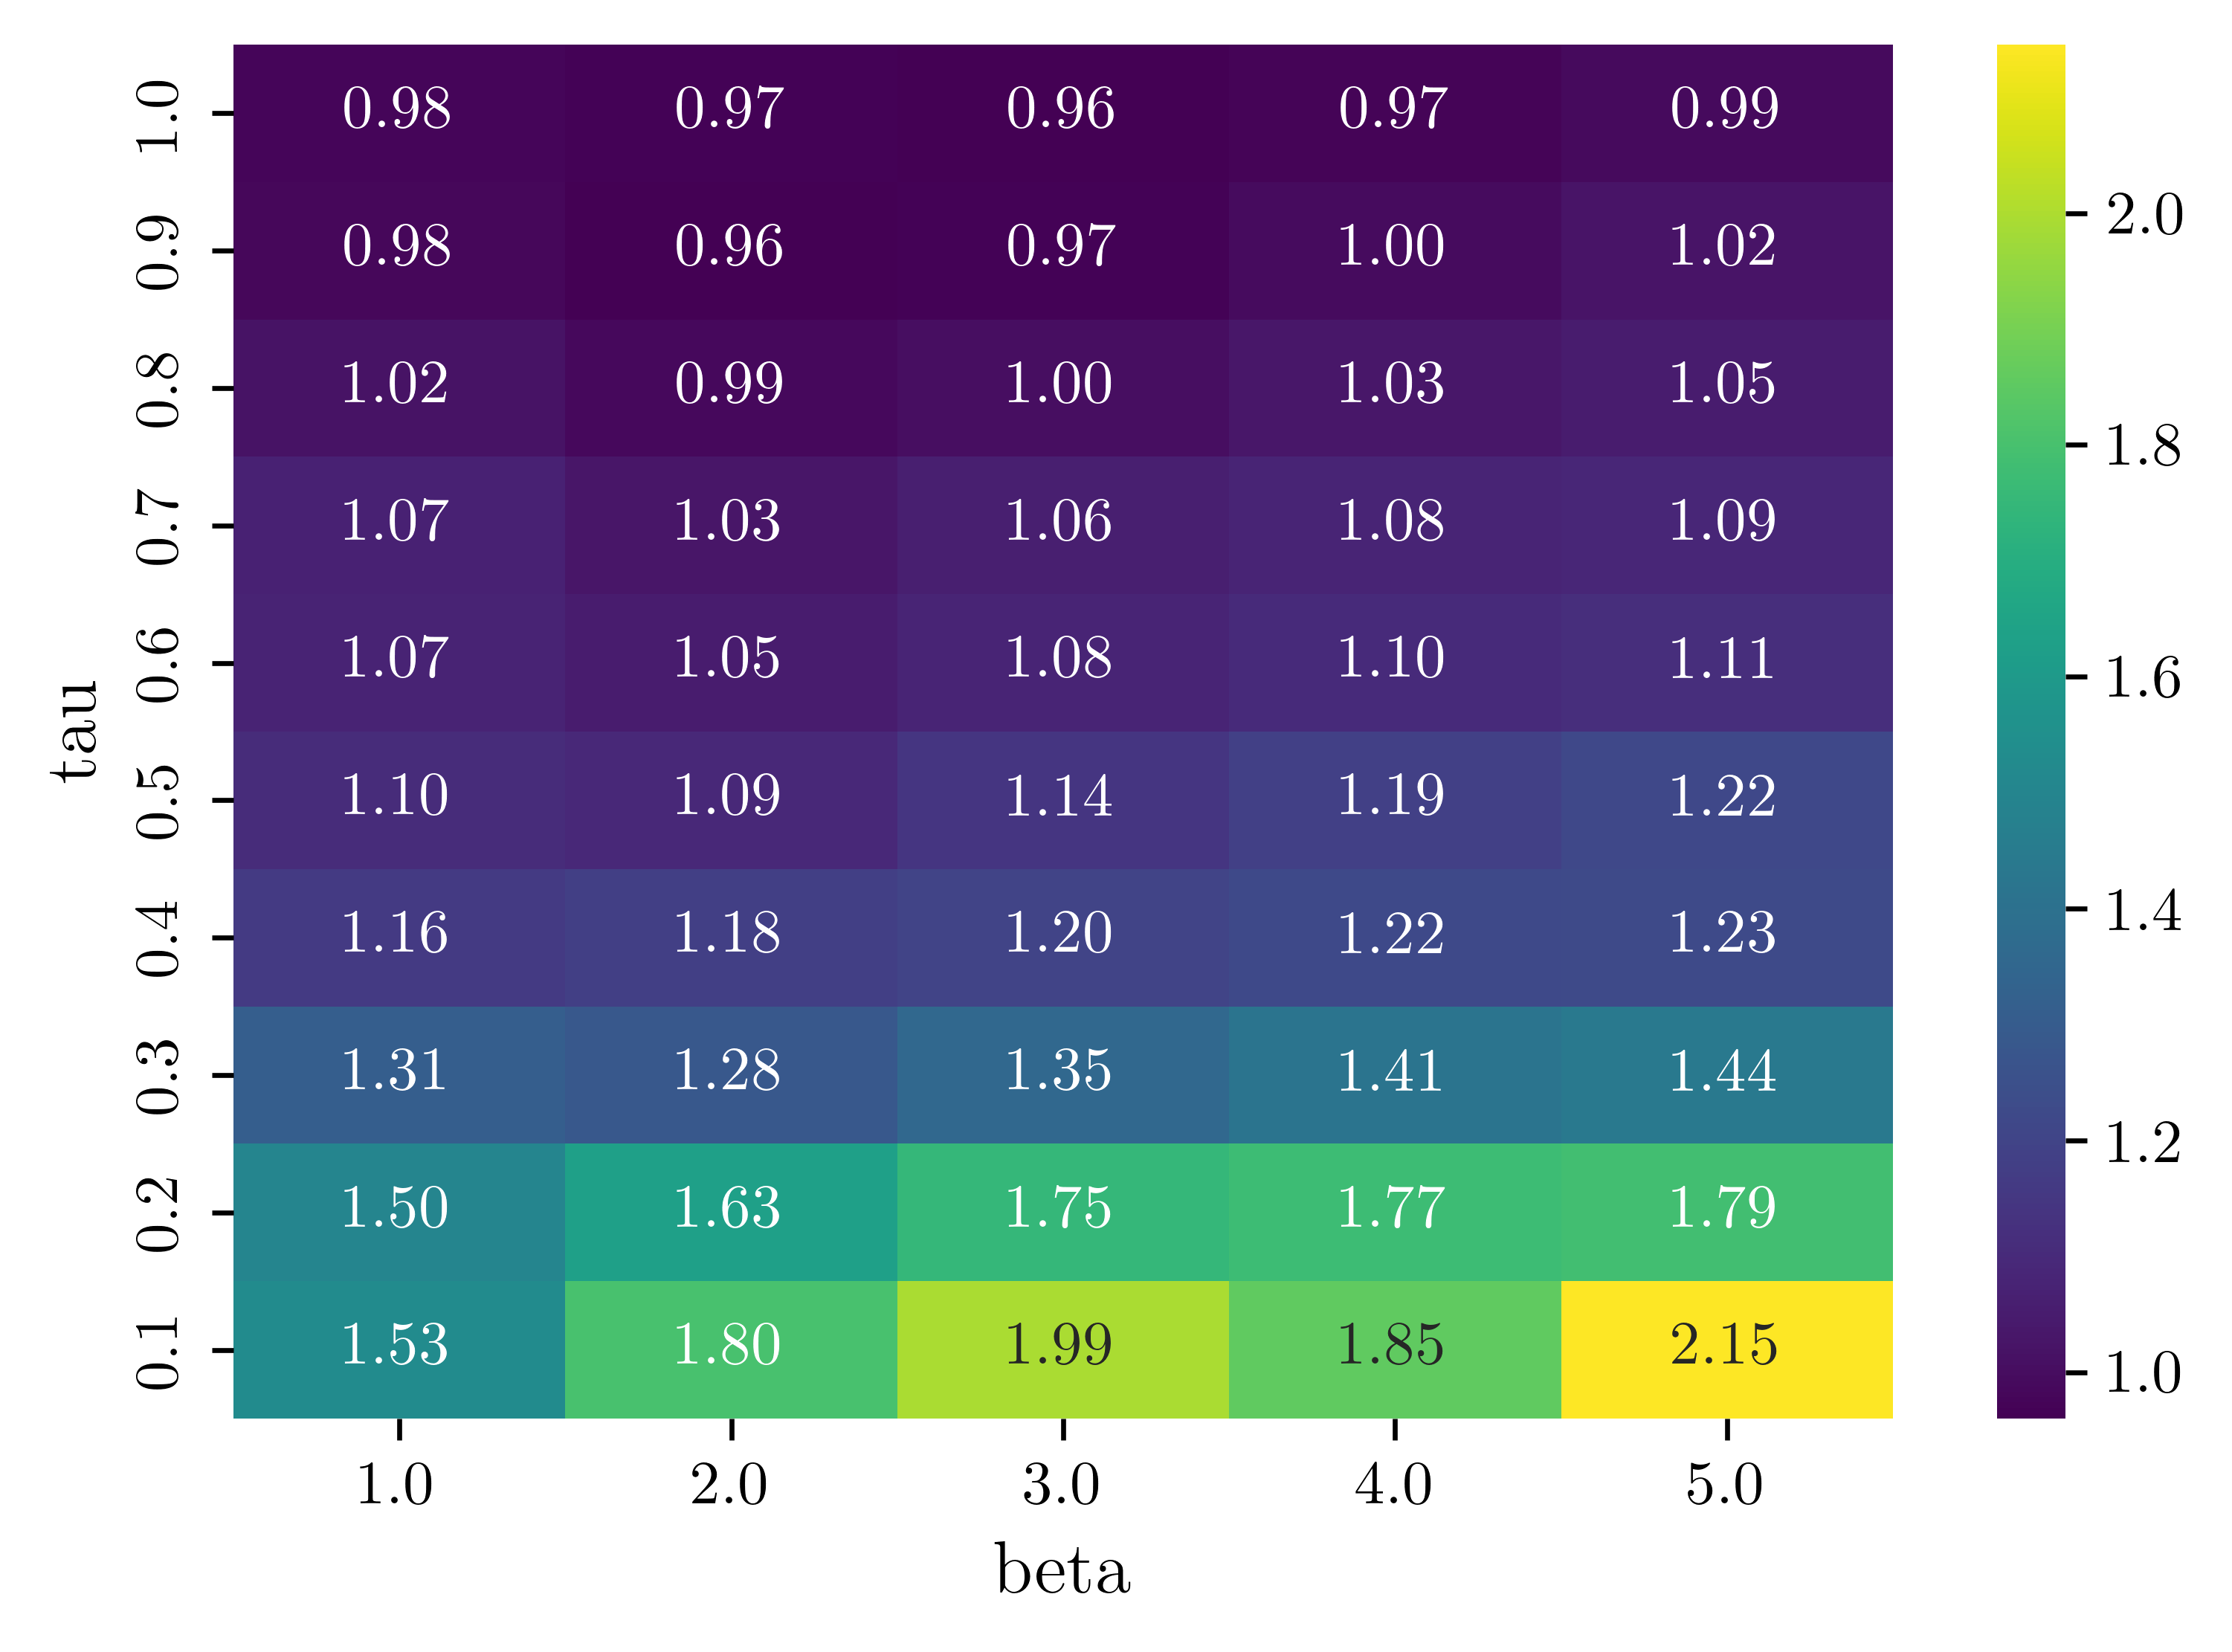

In [16]:
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis",)
ax.invert_yaxis()

<Axes: xlabel='tau', ylabel='alpha'>

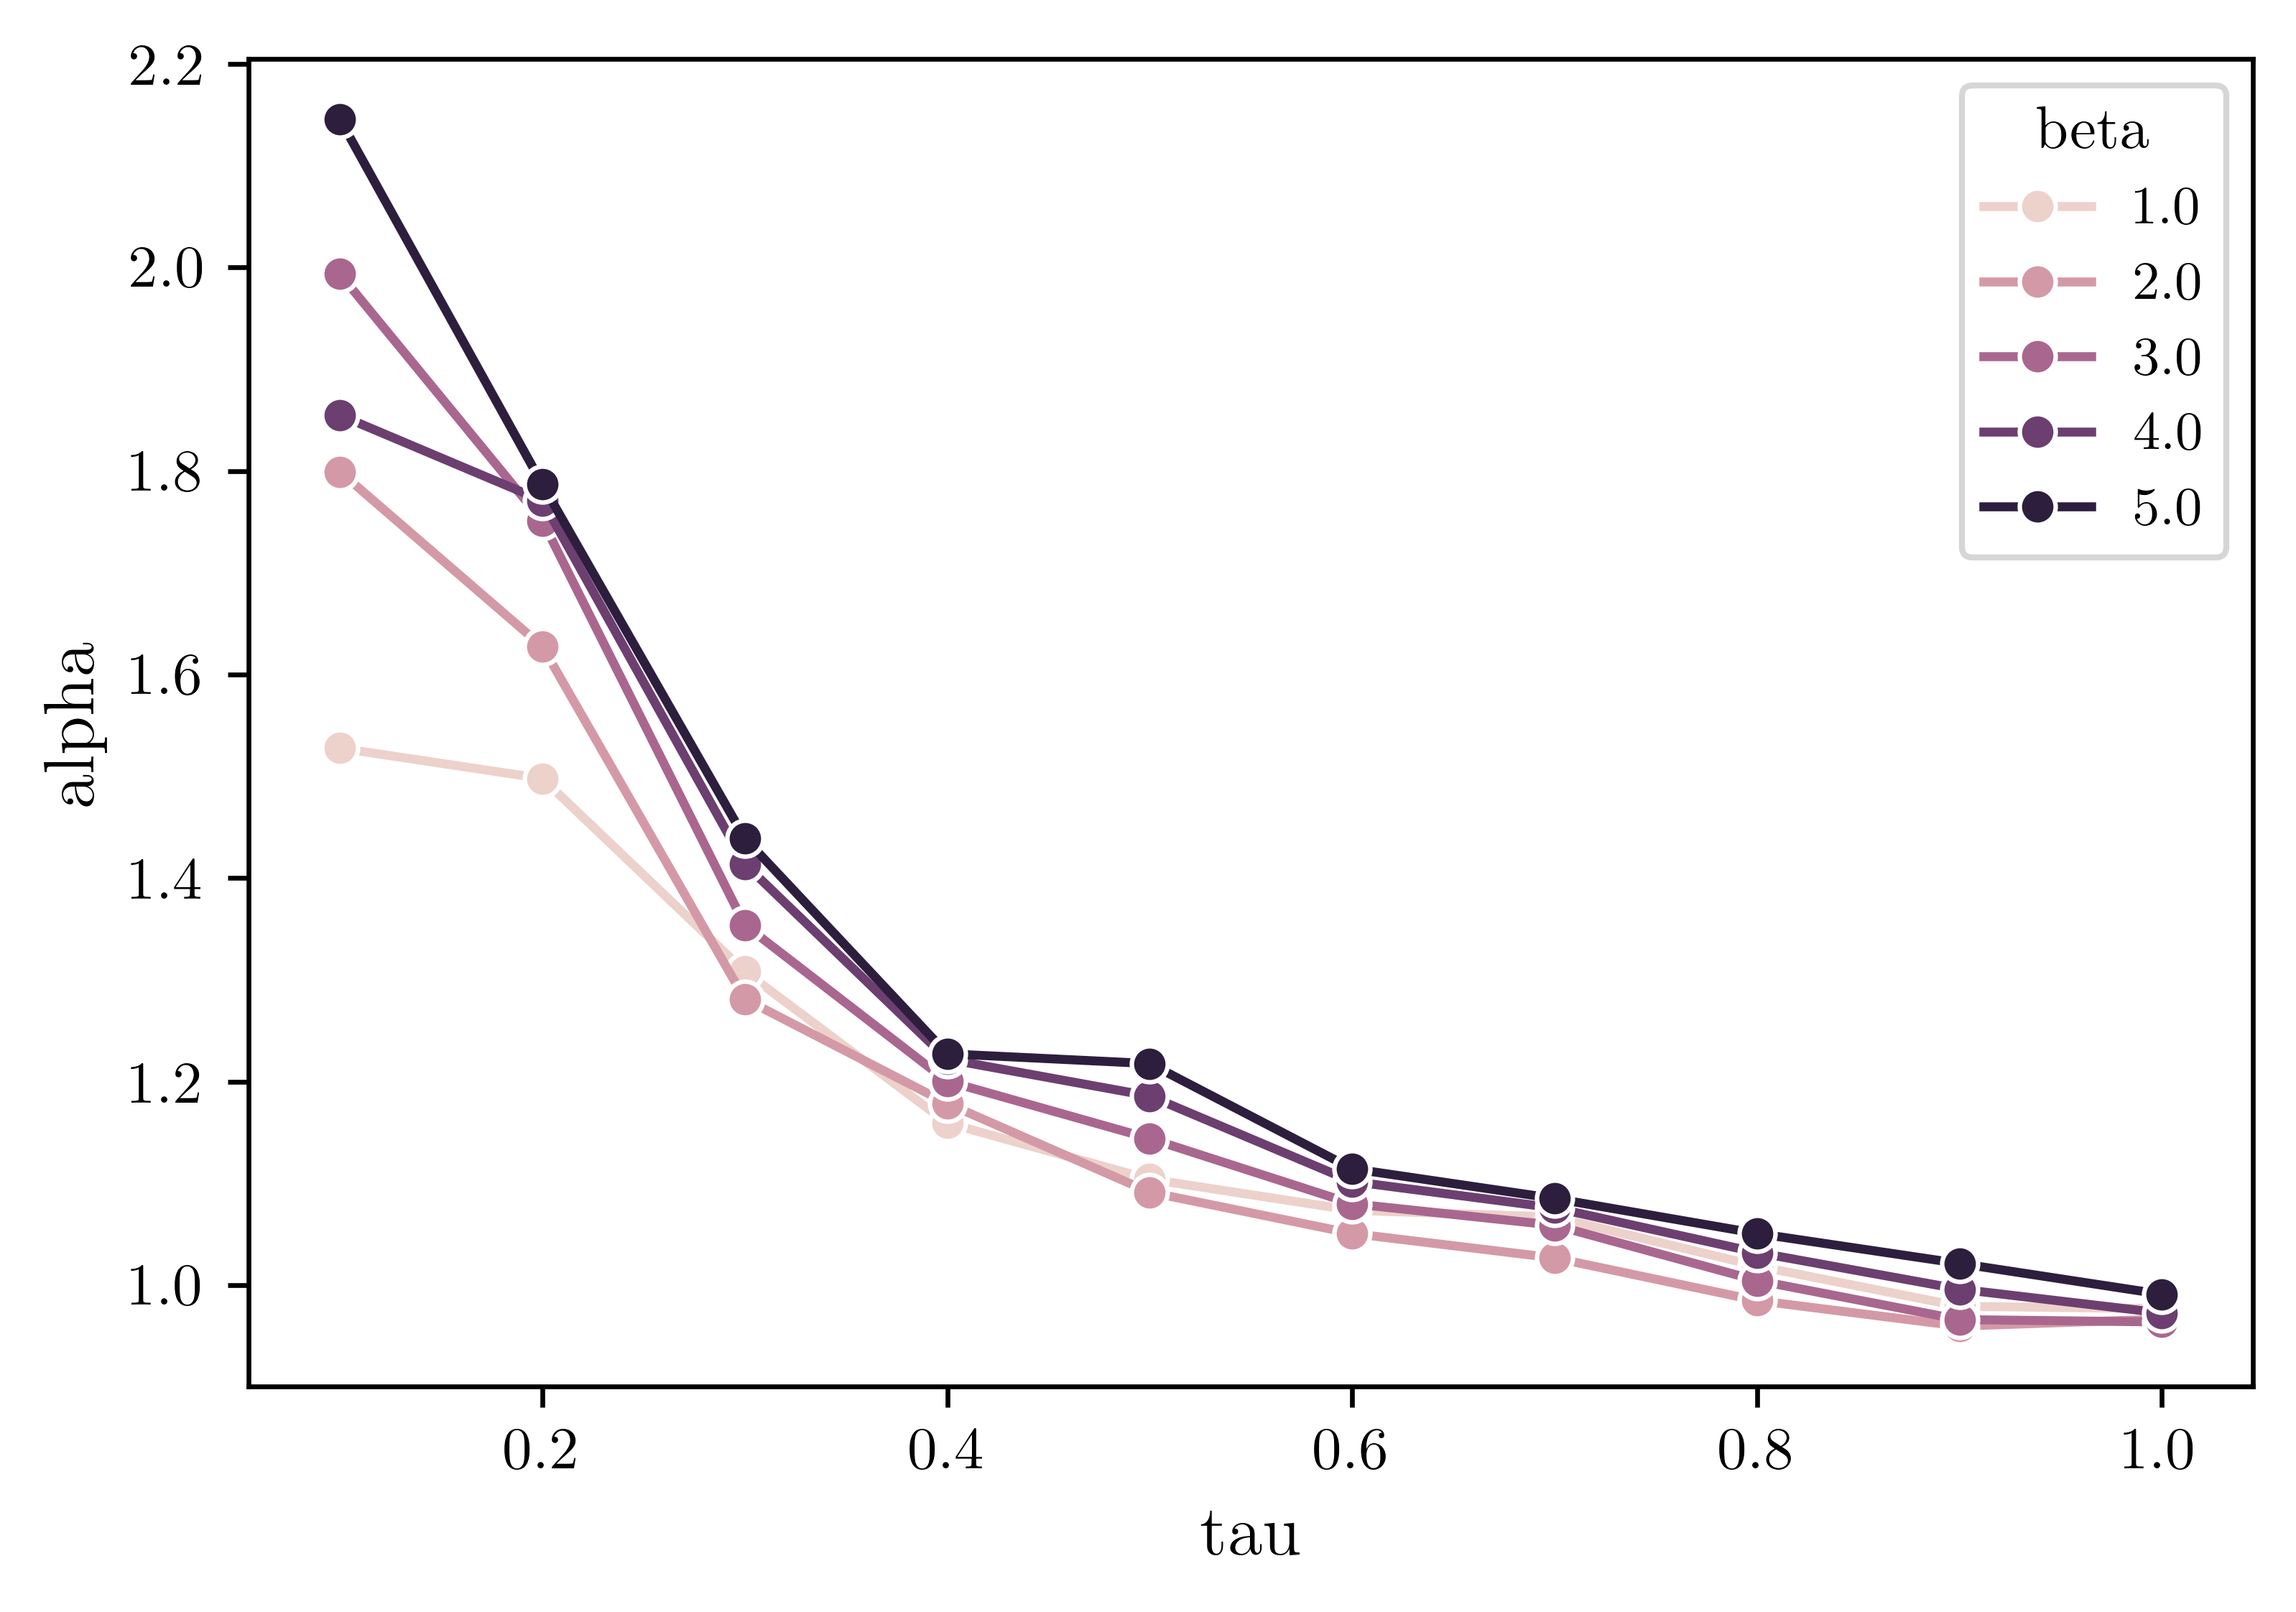

In [18]:
sns.lineplot(data=df, x='tau', y='alpha', hue='beta', marker='o')